In [3]:
from glob import iglob, glob
from datetime import datetime
from itertools import chain, repeat

import numpy as np
import pandas as pd
from cytoolz import compose, reduce
from h5py import File
from dask import delayed, compute
from dask.bag import from_sequence
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt

In [10]:
run = 19
filenames = glob(f"/data/Test/Run_{run:03d}/work/reduced_dt=*.h5")

delays = [float(fn[:-3].split("_dt=")[-1]) for fn in filenames]

In [14]:
def read_file(filename):
    with File(filename, "r") as f:
        return {
            'bg_n': f['bg_n'].value,
            'bg_img': f['bg_img'].value,
            'sg_n': f['sg_n'].value,
            'sg_img': f['sg_img'].value,
            'df_n': f['df_n'].value,
            'df_img': f['df_img'].value,
        }


df = pd.DataFrame([
    {
        'delay': float(fn[:-3].split("_dt=")[-1]),
        **read_file(fn),
    }
    for fn in filenames
]).set_index('delay')
df

,bg_img,bg_n,df_img,df_n,sg_img,sg_n
delay,,,,,,
-6.05,"[[101.604, 99.58, 100.976, 101.324, 101.534, 1...",1000,"[[0.01300000000000523, -0.1599999999999966, -0...",2000,"[[101.617, 99.42, 100.898, 101.381, 101.5485, ...",2000
-5.45,"[[101.61, 99.167, 101.066, 101.293, 101.514, 1...",1000,"[[0.012500000000002842, 0.3790000000000049, -0...",2000,"[[101.6225, 99.546, 100.9935, 101.2995, 101.50...",2000


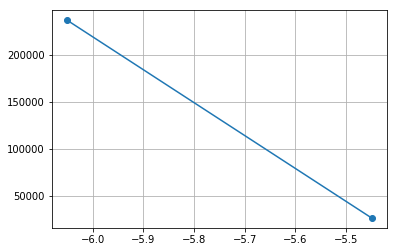

In [18]:
plt.figure()
plt.plot(df['df_img'].apply(np.sum), 'o-')
plt.grid(True)
plt.show()

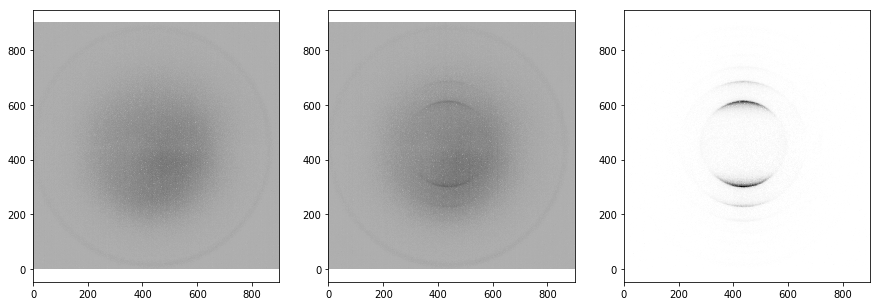

In [21]:
for k, d in avg.items():
    with File(f"{writein}/reduced_dt={k}.h5", "w") as f:
        f['bg_n'] = d['bg_n']
        f['bg_img'] = d['bg_img']
        f['sg_n'] = d['sg_n']
        f['sg_img'] = d['sg_img']
        f['df_n'] = d['df_n']
        f['df_img'] = d['df_img']